In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../Data/china_gdp.csv')

# Convert Year to numeric (assuming it's in the format YYYY)
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Prepare the data
X = df['Year'].values.reshape(-1, 1)
y = df['Value'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [9]:
# Predictions
linear_pred = linear_model.predict(X_test)
poly_pred = poly_model.predict(X_poly_test)

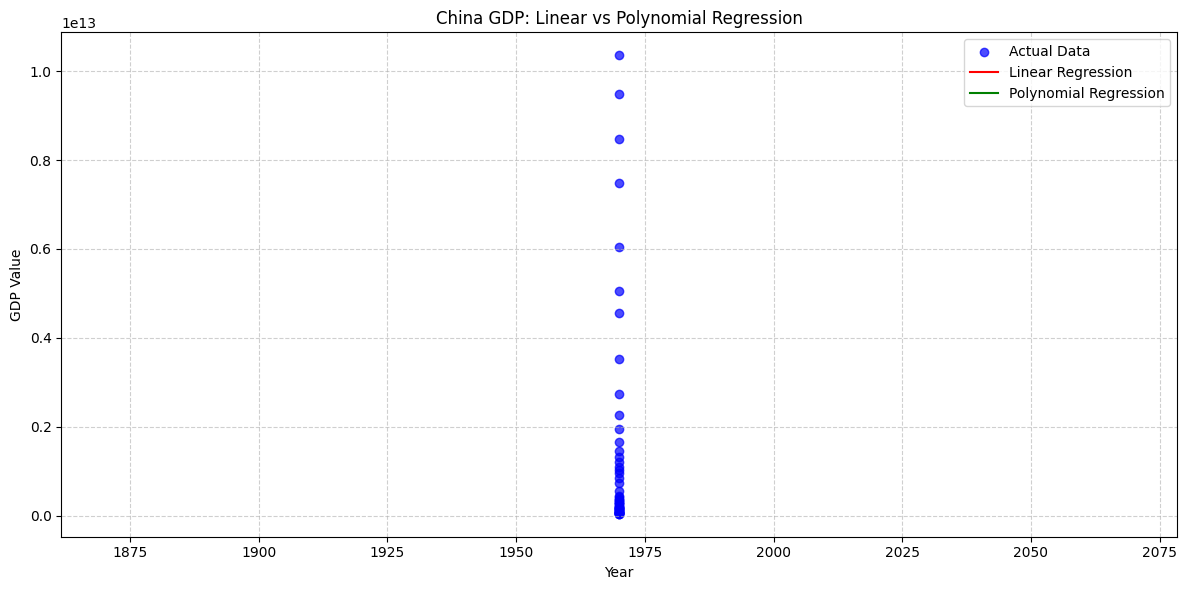

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X_test, linear_pred, color='red', label='Linear Regression')
plt.plot(X_test, poly_pred, color='green', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title('China GDP: Linear vs Polynomial Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [11]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Evaluate Linear Regression
linear_mse, linear_rmse, linear_mae = evaluate_model(y_test, linear_pred)

# Evaluate Polynomial Regression
poly_mse, poly_rmse, poly_mae = evaluate_model(y_test, poly_pred)

print("Linear Regression Evaluation:")
print(f"MSE: {linear_mse:.2e}")
print(f"RMSE: {linear_rmse:.2e}")
print(f"MAE: {linear_mae:.2e}")

print("\nPolynomial Regression Evaluation:")
print(f"MSE: {poly_mse:.2e}")
print(f"RMSE: {poly_rmse:.2e}")
print(f"MAE: {poly_mae:.2e}")

Linear Regression Evaluation:
MSE: 6.65e+24
RMSE: 2.58e+12
MAE: 1.74e+12

Polynomial Regression Evaluation:
MSE: 6.65e+24
RMSE: 2.58e+12
MAE: 1.74e+12
